# **CASE: VENDA DE VEÍCULOS**

---

### Leitura da base de dados

In [1]:
dados_veiculos <- read.table(file   = "../Dados/Venda_Veiculos.txt",
                             sep    = "\t",
                             header = TRUE)

### Visualização da base de dados

In [2]:
View(dados_veiculos)

Tempo_Experiencia,Valor_Medio_Mensal_Vendas
<int>,<int>
1,775
1,630
2,775
2,1046
3,752
3,255
3,1049
3,701
3,418


### Análise exploratória breve

In [3]:
# Medidas resumo
summary(dados_veiculos)

 Tempo_Experiencia Valor_Medio_Mensal_Vendas
 Min.   : 1.000    Min.   : 255.0           
 1st Qu.: 3.000    1st Qu.: 757.8           
 Median : 7.500    Median :1055.0           
 Mean   : 7.867    Mean   :1071.2           
 3rd Qu.:10.750    3rd Qu.:1366.5           
 Max.   :20.000    Max.   :2215.0           

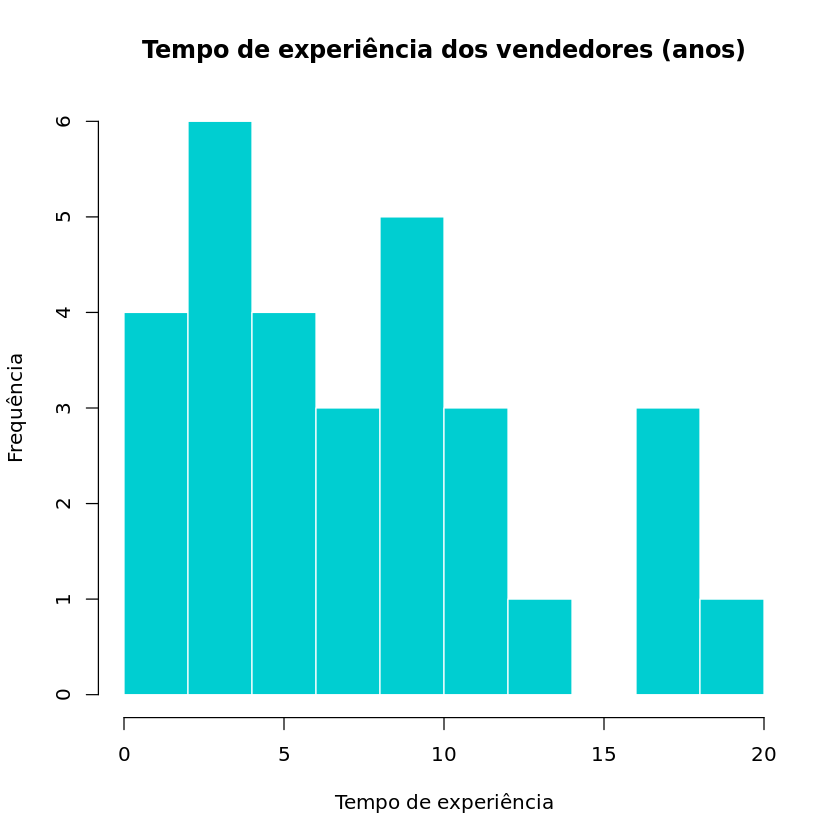

In [4]:
# Histograma do tempo de experiência dos vendedores
hist(dados_veiculos$Tempo_Experiencia,
     main = "Tempo de experiência dos vendedores (anos)",
     col = "darkturquoise",
     border = "white",
     xlab = "Tempo de experiência",
     ylab = "Frequência",
     breaks = 10)

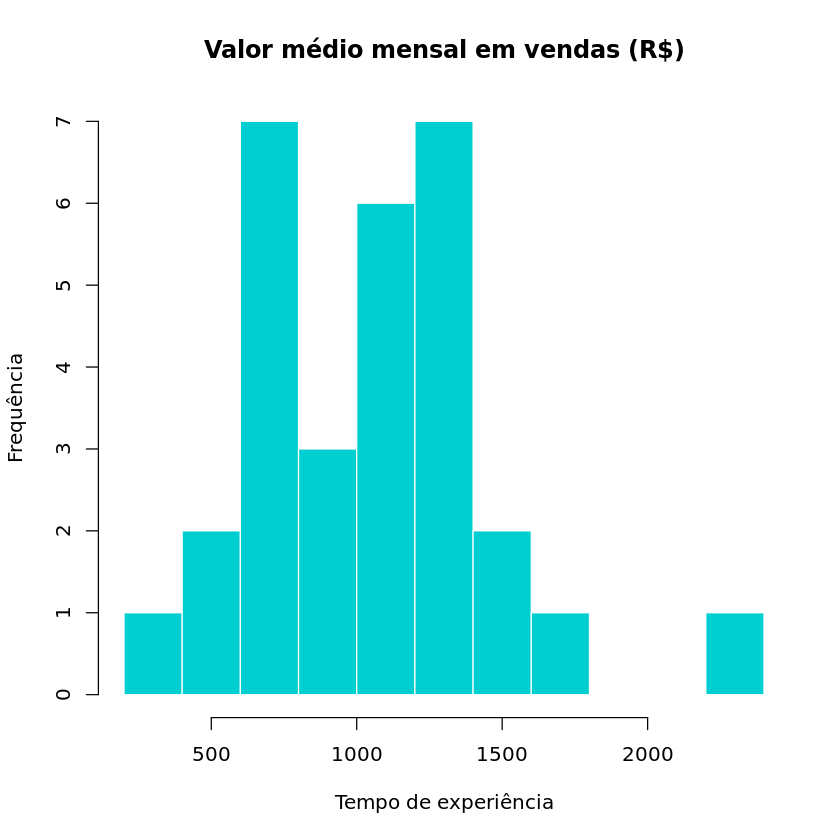

In [5]:
# Histograma do valor médio mensal em vendas
hist(dados_veiculos$Valor_Medio_Mensal_Vendas,
     main = "Valor médio mensal em vendas (R$)",
     col = "darkturquoise",
     border = "white",
     xlab = "Tempo de experiência",
     ylab = "Frequência",
     breaks = 10)

### Análise bivariada: variável resposta vs. variáveis explicativas

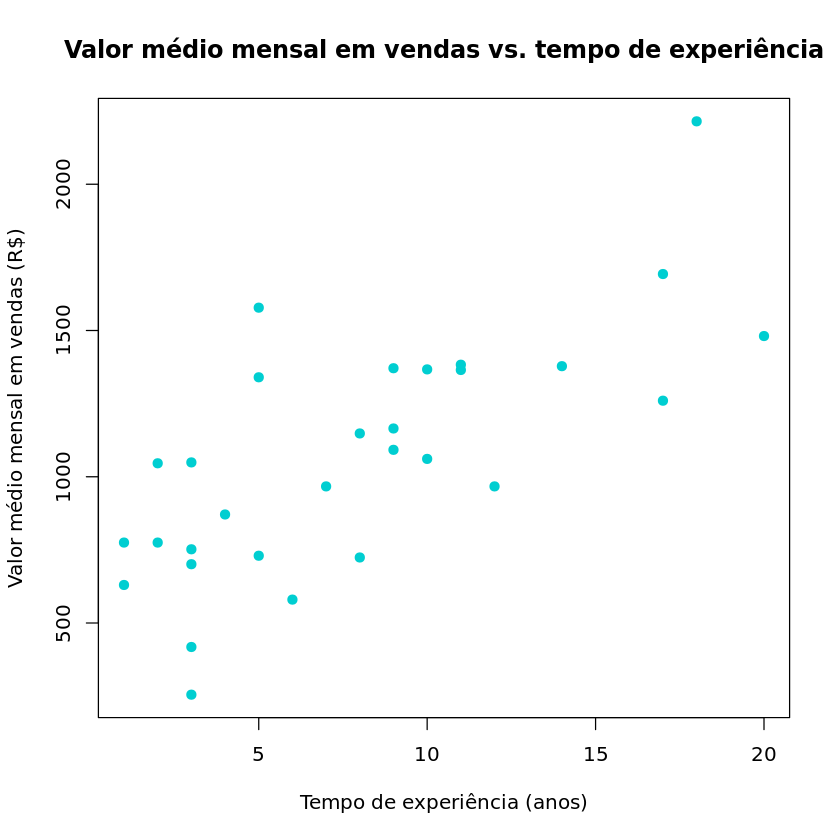

In [6]:
# Gráfico de dispersão
plot(x    = dados_veiculos$Tempo_Experiencia,
     y    = dados_veiculos$Valor_Medio_Mensal_Vendas,
     pch  = 19,
     col  = "darkturquoise",
     xlab = "Tempo de experiência (anos)",
     ylab = "Valor médio mensal em vendas (R$)",
     main = "Valor médio mensal em vendas vs. tempo de experiência")

In [7]:
# Coeficiente de correlação
cor(dados_veiculos$Tempo_Experiencia, dados_veiculos$Valor_Medio_Mensal_Vendas)

[1] 0.725681

### Modelo de regressão linear simples

In [8]:
# Comando auxiliar para para omitir notação científica nos p-valores e controlar largura dos outputs na tela do Colab
options(scipen = 999, width = 200)

In [9]:
# Ajuste do modelo
regressao <- lm(Valor_Medio_Mensal_Vendas ~ Tempo_Experiencia,
                data = dados_veiculos)

summary(regressao)


Call:
lm(formula = Valor_Medio_Mensal_Vendas ~ Tempo_Experiencia, data = dados_veiculos)

Residuals:
    Min      1Q  Median      3Q     Max 
-543.66 -167.94  -10.21  131.77  667.32 

Coefficients:
                  Estimate Std. Error t value    Pr(>|t|)    
(Intercept)         630.64      94.96   6.641 0.000000332 ***
Tempo_Experiencia    56.01      10.04   5.581 0.000005683 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 289 on 28 degrees of freedom
Multiple R-squared:  0.5266,	Adjusted R-squared:  0.5097 
F-statistic: 31.15 on 1 and 28 DF,  p-value: 0.000005683


### Intervalos de confiança

In [10]:
# Intercepto (beta 0)
print("Limite inferior")
as.numeric(regressao$coefficients[1] - 1.96 * coef(summary(regressao))[1, "Std. Error"])
print("Limite superior")
as.numeric(regressao$coefficients[1] + 1.96 * coef(summary(regressao))[1, "Std. Error"])

[1] "Limite inferior"


[1] 444.5196

[1] "Limite superior"


[1] 816.7514

In [11]:
# Ângulo (beta 1)
print("Limite inferior")
as.numeric(regressao$coefficients[2] - 1.96 * coef(summary(regressao))[2, "Std. Error"])
print("Limite superior")
as.numeric(regressao$coefficients[2] + 1.96 * coef(summary(regressao))[2, "Std. Error"])

[1] "Limite inferior"


[1] 36.3388

[1] "Limite superior"


[1] 75.6776

### Gráfico de dispersão com reta ajustada

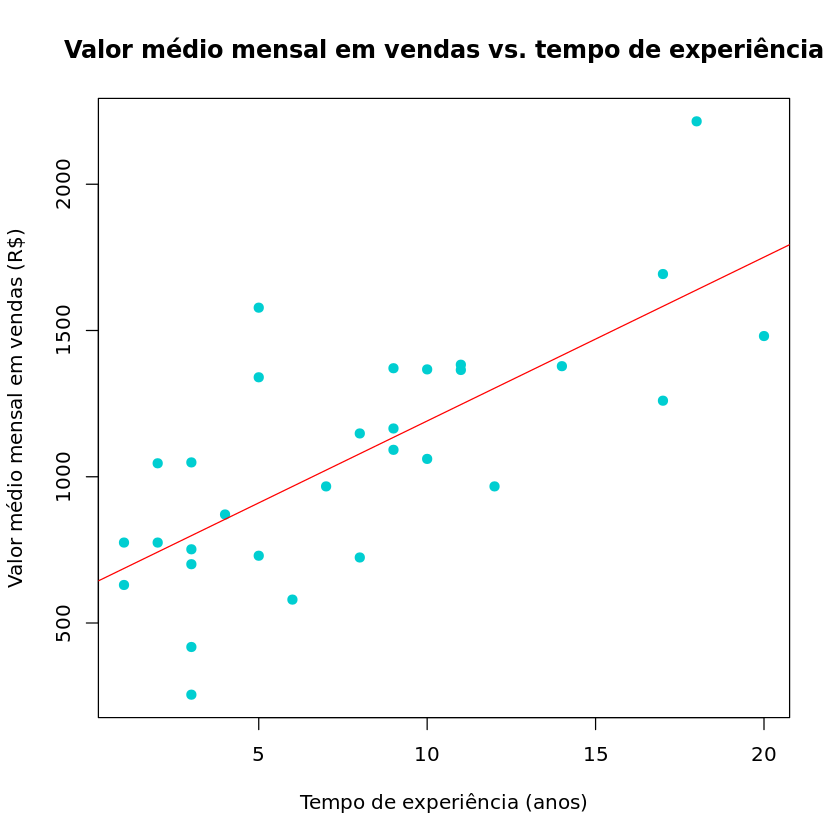

In [12]:
plot(x    = dados_veiculos$Tempo_Experiencia,
     y    = dados_veiculos$Valor_Medio_Mensal_Vendas,
     pch  = 19,
     col  = "darkturquoise",
     xlab = "Tempo de experiência (anos)",
     ylab = "Valor médio mensal em vendas (R$)",
     main = "Valor médio mensal em vendas vs. tempo de experiência")
points(abline(regressao,
              col = "red"))

### Qualidade de ajuste

In [13]:
# Coeficiente de determinação (R²)
summary(regressao)$r.squared

[1] 0.526613

In [14]:
# MAE
sum(abs(regressao$residuals))/nrow(dados_veiculos)

[1] 216.035

In [15]:
# MAPE
sum(abs(regressao$residuals/dados_veiculos$Valor_Medio_Mensal_Vendas))/nrow(dados_veiculos)

[1] 0.270459

### Análise de resíduos

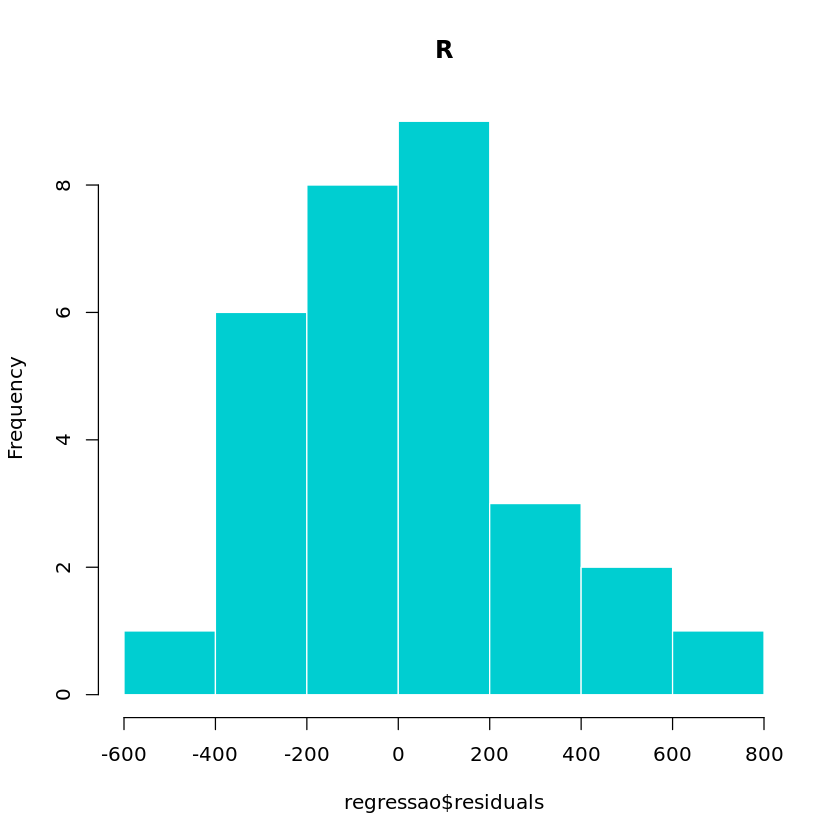

In [16]:
# Histograma dos resíduos
hist_values <- hist(x      = regressao$residuals,
     main   = "R",
     col    = "darkturquoise",
     border = "white")

In [17]:
print(hist_values$breaks)
print(hist_values$counts)

[1] -600 -400 -200    0  200  400  600  800
[1] 1 6 8 9 3 2 1


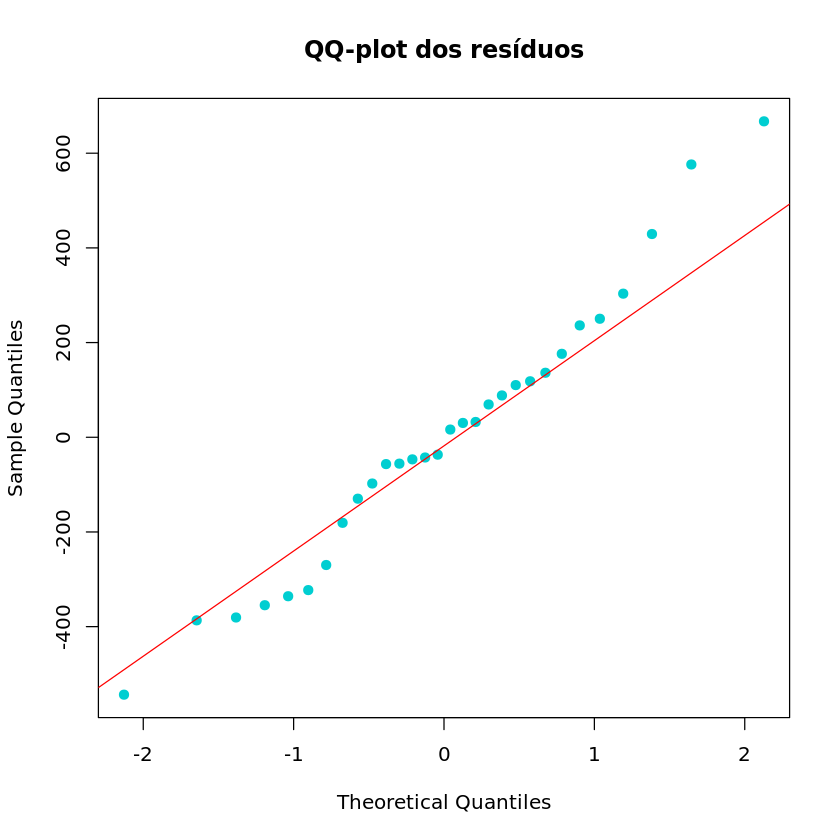

In [24]:
# QQ plot dos resíduos
qqnorm(y    = regressao$residuals,
       main = "QQ-plot dos resíduos",
       col  = "darkturquoise",
       pch  = 19)
qqline(y    = regressao$residuals,
       col  = "red")

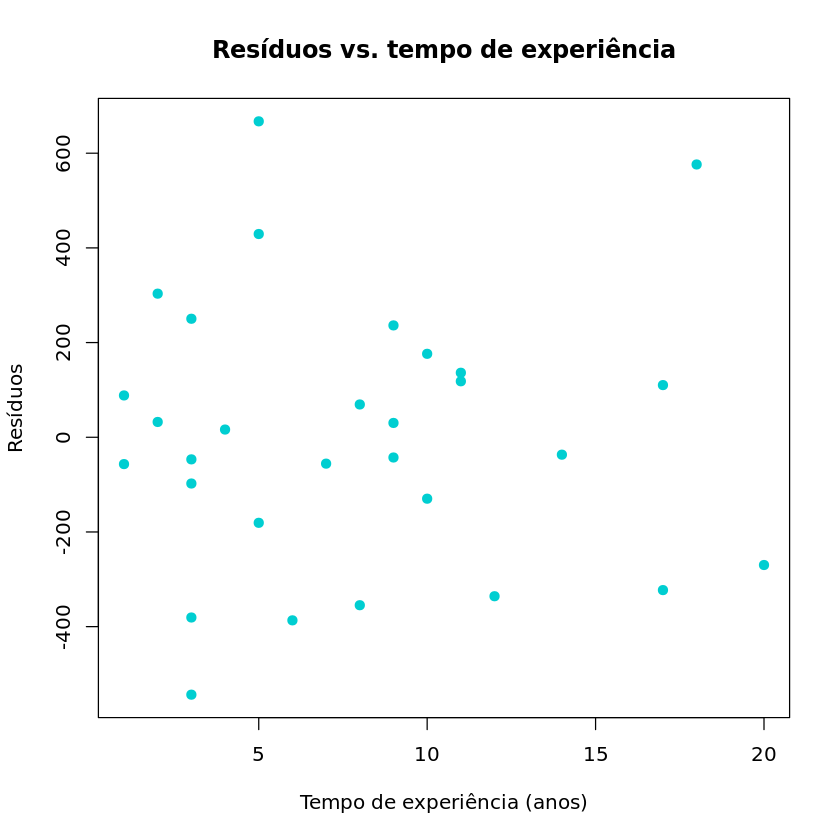

In [19]:
# Resíduos vs. tempo de experiência
plot(x    = dados_veiculos$Tempo_Experiencia,
     y    = regressao$residuals,
     pch  = 19,
     col  = "darkturquoise",
     xlab = "Tempo de experiência (anos)",
     ylab = "Resíduos",
     main = "Resíduos vs. tempo de experiência")

### Exemplo de uso (aplicação) do modelo

In [20]:
# Criação de base de dados com um novo vendedor, com 12 anos de experiência
# Obs.: o nome de coluna deve ser idêntico ao da base utilizada para construção do modelo ("Tempo_Experiencia")
novos_dados <- data.frame(Tempo_Experiencia = c(12))

In [21]:
# Aplicação do modelo
novos_dados$Tempo_Experiencia_Predito <- predict(regressao, novos_dados)
View(novos_dados)

Tempo_Experiencia,Tempo_Experiencia_Predito
<dbl>,<dbl>
12,1302.734
